<a href="https://colab.research.google.com/github/rachitjindal56/Pigmented-Skin-Lesions-Classification-CNN/blob/main/Skin_Lesions_Classification_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Processing


In [ ]:
%%time
try:
  import os
  import numpy as np
  import pandas as pd

  from PIL import Image
  from glob import glob

  from sklearn.preprocessing import LabelEncoder, StandardScaler

  import plotly.graph_objects as go
  import plotly.express as px
  from plotly.subplots import make_subplots
  import matplotlib.pyplot as plt
  import pydot

  from sklearn.model_selection import train_test_split
  from sklearn.metrics import classification_report

  import tensorflow as tf
  
  from tensorflow.keras.preprocessing.image import ImageDataGenerator
  from tensorflow.keras.models import Sequential
  from tensorflow.keras.layers import Conv2D, Flatten, BatchNormalization, Dropout, Dense, MaxPool2D
  from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping

  from IPython.display import display
  
  print("Imported")

except:
  print("Error")

Imported
CPU times: user 516 ms, sys: 98.7 ms, total: 615 ms
Wall time: 1.14 s


In [ ]:
os.chdir("/content/drive/MyDrive/Minor/skin-cancer-mnist-ham10000/")

In [ ]:
os.listdir()

['HAM10000_metadata.csv',
 'HAM10000_images_part_1',
 'HAM10000_images_part_2',
 'ml_clinical_applications',
 'model_plot.png']

In [ ]:
data = pd.read_csv('HAM10000_metadata.csv')
data.head()

,lesion_id,image_id,dx,dx_type,age,sex,localization
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear


In [ ]:
lesion_type_dict = {
    'nv': 'Melanocytic nevi (nv)',
    'mel': 'Melanoma (mel)',
    'bkl': 'Benign keratosis-like lesions (bkl)',
    'bcc': 'Basal cell carcinoma (bcc)',
    'akiec': 'Actinic keratoses (akiec)',
    'vasc': 'Vascular lesions (vasc)',
    'df': 'Dermatofibroma (df)'
}
label_mapping = {
    0: 'nv',
    1: 'mel',
    2: 'bkl',
    3: 'bcc',
    4: 'akiec',
    5: 'vasc',
    6: 'df'
}
reverse_label_mapping = dict((value, key) for key, value in label_mapping.items())

In [ ]:
%%time
imageid_path_dict = {os.path.splitext(os.path.basename(x))[0]: x
                     for x in glob(os.path.join("/content/drive/MyDrive/Minor/skin-cancer-mnist-ham10000/","*",'*.jpg'))}

CPU times: user 85 ms, sys: 10.1 ms, total: 95.1 ms
Wall time: 1.13 s


In [ ]:
imageid_path_dict

{'ISIC_0028313': '/content/drive/MyDrive/Minor/skin-cancer-mnist-ham10000/HAM10000_images_part_1/ISIC_0028313.jpg',
 'ISIC_0028281': '/content/drive/MyDrive/Minor/skin-cancer-mnist-ham10000/HAM10000_images_part_1/ISIC_0028281.jpg',
 'ISIC_0028269': '/content/drive/MyDrive/Minor/skin-cancer-mnist-ham10000/HAM10000_images_part_1/ISIC_0028269.jpg',
 'ISIC_0028295': '/content/drive/MyDrive/Minor/skin-cancer-mnist-ham10000/HAM10000_images_part_1/ISIC_0028295.jpg',
 'ISIC_0028292': '/content/drive/MyDrive/Minor/skin-cancer-mnist-ham10000/HAM10000_images_part_1/ISIC_0028292.jpg',
 'ISIC_0028299': '/content/drive/MyDrive/Minor/skin-cancer-mnist-ham10000/HAM10000_images_part_1/ISIC_0028299.jpg',
 'ISIC_0028286': '/content/drive/MyDrive/Minor/skin-cancer-mnist-ham10000/HAM10000_images_part_1/ISIC_0028286.jpg',
 'ISIC_0028297': '/content/drive/MyDrive/Minor/skin-cancer-mnist-ham10000/HAM10000_images_part_1/ISIC_0028297.jpg',
 'ISIC_0028312': '/content/drive/MyDrive/Minor/skin-cancer-mnist-ham1000

In [ ]:
data['cell_type'] = data['dx'].map(lesion_type_dict.get)
data['path'] = data['image_id'].map(imageid_path_dict.get)

In [ ]:
%%time
data['image_pixel'] = data['path'].map(lambda x: np.asarray(Image.open(x).resize((28,28))))

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py", line 2882, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-11-eaf9bf5e3cd4>", line 1, in <module>
    get_ipython().run_cell_magic('time', '', "data['image_pixel'] = data['path'].map(lambda x: np.asarray(Image.open(x).resize((28,28))))")
  File "/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py", line 2117, in run_cell_magic
    result = fn(magic_arg_s, cell)
  File "<decorator-gen-53>", line 2, in time
  File "/usr/local/lib/python3.7/dist-packages/IPython/core/magic.py", line 188, in <lambda>
    call = lambda f, *a, **k: f(*a, **k)
  File "/usr/local/lib/python3.7/dist-packages/IPython/core/magics/execution.py", line 1193, in time
    exec(code, glob, local_ns)
  File "<timed exec>", line 1, in <module>
  File "/usr/local/lib/python3.7/dist-packages/pandas/core/series.py", line 4161, in map
    new_values 

KeyboardInterrupt: ignored

In [ ]:
data.head()

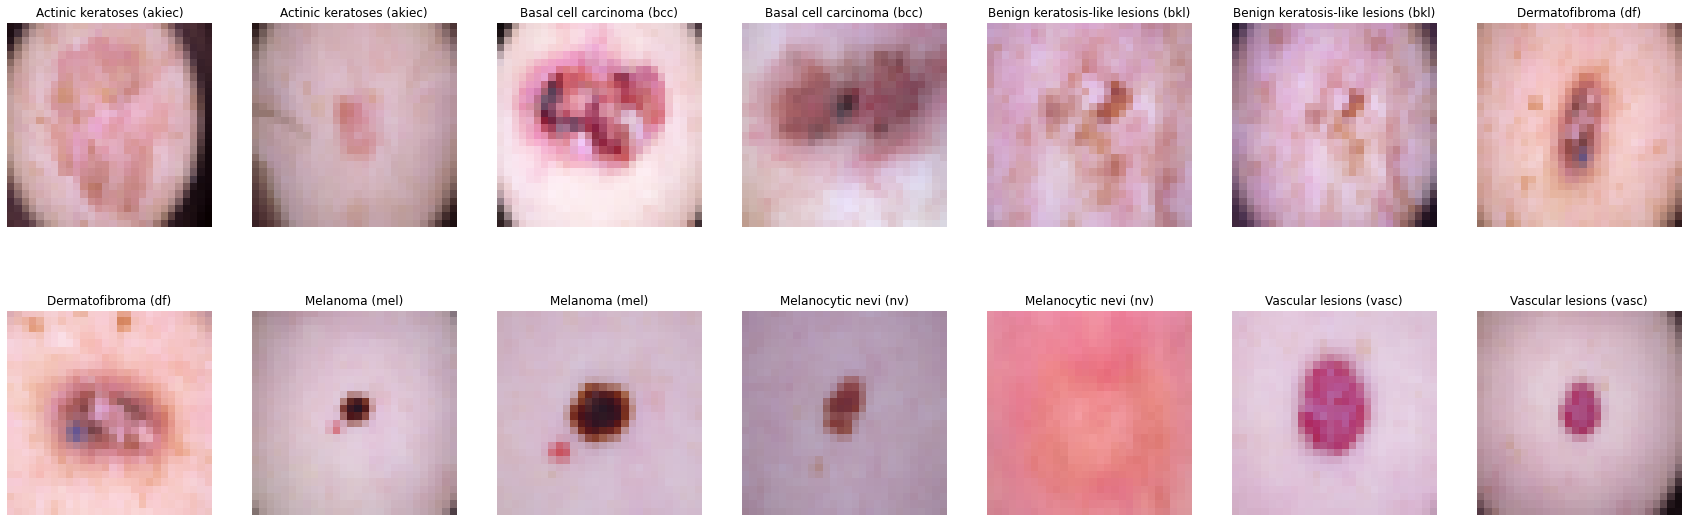

In [ ]:
sample_data = data.groupby('dx').apply(lambda df: df.iloc[:2, [9, 7]])
plt.figure(figsize=(30,15))
for i in range(14):
    plt.subplot(3, 7, i + 1)
    plt.imshow(np.squeeze(sample_data['image_pixel'][i]))
    img_label = sample_data['cell_type'][i]
    plt.title(img_label)
    plt.axis("off")
plt.show()

In [ ]:
data['age'].fillna(value=int(data['age'].mean()), inplace=True)
data['age'] = data['age'].astype('int32')
data['label'] = data['dx'].map(reverse_label_mapping.get)

In [ ]:
%%time
index0 = data[data['label'] == 0].index.values
index1 = data[data['label'] == 1].index.values
index2 = data[data['label'] == 2].index.values
index3 = data[data['label'] == 3].index.values
index4 = data[data['label'] == 4].index.values
index5 = data[data['label'] == 5].index.values
index6 = data[data['label'] == 6].index.values

df_index0 = data.iloc[int(min(index0)):int(max(index0)+1)]
df_index1 = data.iloc[int(min(index1)):int(max(index1)+1)]
df_index2 = data.iloc[int(min(index2)):int(max(index2)+1)]
df_index3 = data.iloc[int(min(index3)):int(max(index3)+1)]
df_index4 = data.iloc[int(min(index4)):int(max(index4)+1)]
df_index5 = data.iloc[int(min(index5)):int(max(index5)+1)]
df_index6 = data.iloc[int(min(index6)):int(max(index6)+1)]

df_index0 = df_index0.append([df_index0]*9, ignore_index = True)
df_index1 = df_index1.append([df_index1]*10, ignore_index = True)
df_index2 = df_index2.append([df_index2]*11, ignore_index = True)
df_index3 = df_index3.append([df_index3]*8, ignore_index = True)
df_index4 = df_index4.append([df_index4]*14, ignore_index = True)
df_index5 = df_index5.append([df_index5]*12, ignore_index = True)
df_index6 = df_index6.append([df_index6]*13, ignore_index = True)

frames = [data,df_index0 ,df_index1, df_index2, df_index3, df_index4, df_index5, df_index6]
final_data = pd.concat(frames)

CPU times: user 180 ms, sys: 25.1 ms, total: 205 ms
Wall time: 206 ms


In [ ]:
%%time
print(data.shape)
print(final_data.shape)

(10015, 11)
(331660, 11)
CPU times: user 351 µs, sys: 976 µs, total: 1.33 ms
Wall time: 1.49 ms


In [ ]:
X_orig = data['image_pixel'].to_numpy()
X_orig = np.stack(X_orig, axis=0)
Y_orig = np.array(data.iloc[:, -1:])
print(X_orig.shape)
print(Y_orig.shape)

(10015, 28, 28, 3)
(10015, 1)


In [ ]:
X_aug = final_data['image_pixel'].to_numpy()
X_aug = np.stack(X_aug, axis=0)
Y_aug = np.array(final_data.iloc[:, -1:])
print(X_aug.shape)
print(Y_aug.shape)

(331660, 28, 28, 3)
(331660, 1)


## Data Augmentation

In [ ]:
def prepare_for_train_test(X, Y=None):
    # Splitting into train and test set
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=1)
    X_train = X
    Y_train = Y
    
    # Prepare data for training and testing the model
    train_datagen = ImageDataGenerator(rescale = 1./255,
                                  rotation_range = 10,
                                  width_shift_range = 0.2,
                                  height_shift_range = 0.2,
                                  shear_range = 0.2,
                                  horizontal_flip = True,
                                  vertical_flip = True,
                                  fill_mode = 'nearest')
    train_datagen.fit(X_train)
    test_datagen = ImageDataGenerator(rescale = 1./255)
    test_datagen.fit(X_test)
    return X_train, X_test, Y_train, Y_test

## Model

In [ ]:
def create_model():
    model = Sequential()
    model.add(Conv2D(16, kernel_size = (3,3), input_shape = (28, 28, 3), activation = 'relu', padding = 'same'))
    model.add(MaxPool2D(pool_size = (2,2)))
    model.add(Dropout(rate=0.1))

    model.add(Conv2D(32, kernel_size = (3,3), activation = 'relu', padding = 'same'))
    model.add(MaxPool2D(pool_size = (2,2), padding = 'same'))
    model.add(Dropout(rate=0.1))

    model.add(Conv2D(64, kernel_size = (3,3), activation = 'relu', padding = 'same'))
    model.add(MaxPool2D(pool_size = (2,2), padding = 'same'))
    model.add(Dropout(rate=0.1))
    
    model.add(Conv2D(128, kernel_size = (3,3), activation = 'relu', padding = 'same'))
    model.add(MaxPool2D(pool_size = (2,2), padding = 'same'))

    model.add(Flatten())
    model.add(Dense(64, activation = 'relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(7, activation='softmax'))

    optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001)

    model.compile(loss = 'sparse_categorical_crossentropy',
                 optimizer = optimizer,
                  metrics = ['accuracy'])
    print(model.summary())
    return model

def train_model(model, X_train, Y_train, EPOCHS=25):
    early_stop = EarlyStopping(monitor='val_loss', patience=10, verbose=1, 
                           mode='auto', restore_best_weights=True)
    
    reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5, 
                              verbose=1, mode='auto')
    
    history = model.fit(X_train,
                        Y_train,
                        validation_split=0.2,
                        batch_size = 64,
                        epochs = EPOCHS,
                        callbacks = [reduce_lr, early_stop])
    return history

def test_model(model, X_test, Y_test):
    model_acc = model.evaluate(X_test, Y_test, verbose=0)[1]
    print("Test Accuracy: {:.3f}%".format(model_acc * 100))
    y_true = np.array(Y_test)
    y_pred = model.predict(X_test)
    y_pred = np.array(list(map(lambda x: np.argmax(x), y_pred)))
    clr = classification_report(y_true, y_pred, target_names=label_mapping.values())
    print(clr)
    
    sample_data = X_test[:15]
    plt.figure(figsize=(22, 12))
    for i in range(15):
        plt.subplot(3, 5, i + 1)
        plt.imshow(sample_data[i])
        plt.title(label_mapping[y_true[i][0]] + '|' + label_mapping[y_pred[i]])
        plt.axis("off")
    plt.show()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 16)        448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 16)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 14, 14, 16)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 32)         0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 7, 7, 32)          0

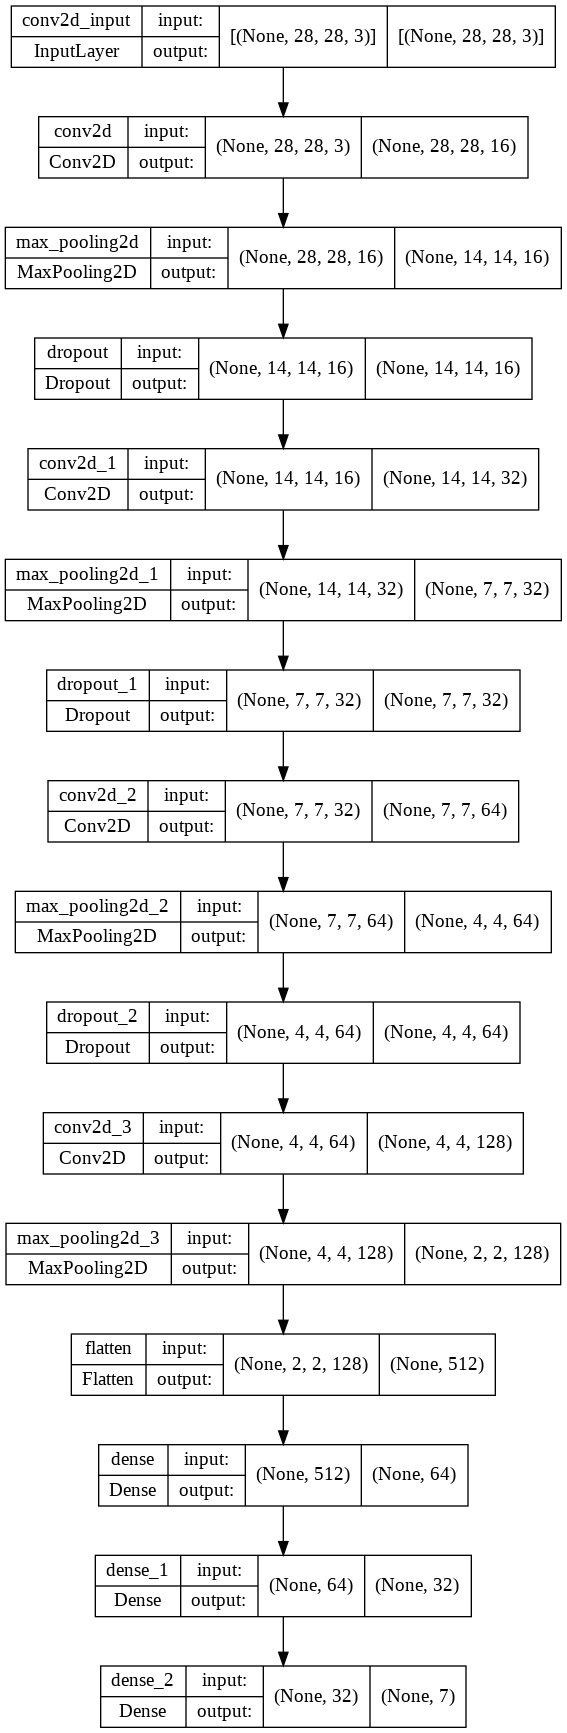

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.utils.vis_utils import plot_model
model = create_model()
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [ ]:
print(model)

In [ ]:
def plot_model_training_curve(history):
    fig = make_subplots(rows=1, cols=2, subplot_titles=['Model Accuracy', 'Model Loss'])
    fig.add_trace(
        go.Scatter(
            y=history.history['accuracy'], 
            name='train_acc'), 
        row=1, col=1)
    fig.add_trace(
        go.Scatter(
            y=history.history['val_accuracy'], 
            name='val_acc'), 
        row=1, col=1)
    fig.add_trace(
        go.Scatter(
            y=history.history['loss'], 
            name='train_loss'), 
        row=1, col=2)
    fig.add_trace(
        go.Scatter(
            y=history.history['val_loss'], 
            name='val_loss'), 
        row=1, col=2)
    fig.show()

In [ ]:
X_train_orig, X_test_orig, Y_train_orig, Y_test_orig = prepare_for_train_test(X_orig, Y_orig)

In [ ]:
model1_history = train_model(model, X_train_orig, Y_train_orig, 100)

Epoch 1/100
126/126 [==============================] - 11s 81ms/step - loss: 2.4816 - accuracy: 0.5714 - val_loss: 1.6735 - val_accuracy: 0.6126 - lr: 0.0010
Epoch 2/100
126/126 [==============================] - 10s 79ms/step - loss: 0.9487 - accuracy: 0.6307 - val_loss: 1.8399 - val_accuracy: 0.3819 - lr: 0.0010
Epoch 3/100
126/126 [==============================] - 10s 78ms/step - loss: 0.8908 - accuracy: 0.6560 - val_loss: 1.7659 - val_accuracy: 0.3939 - lr: 0.0010
Epoch 4/100
126/126 [==============================] - 10s 79ms/step - loss: 0.8440 - accuracy: 0.6782 - val_loss: 1.8567 - val_accuracy: 0.4204 - lr: 0.0010
Epoch 5/100
126/126 [==============================] - 10s 77ms/step - loss: 0.8057 - accuracy: 0.6938 - val_loss: 2.0021 - val_accuracy: 0.4039 - lr: 0.0010
Epoch 6/100
125/126 [============================>.] - ETA: 0s - loss: 0.7589 - accuracy: 0.7074
Epoch 6: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
126/126 [===========================

In [ ]:
plot_model_training_curve(model1_history)

Test Accuracy: 61.408%


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



              precision    recall  f1-score   support

          nv       0.67      0.89      0.77      1327
         mel       0.21      0.23      0.22       222
         bkl       0.15      0.01      0.02       228
         bcc       0.00      0.00      0.00        96
       akiec       0.00      0.00      0.00        61
        vasc       0.00      0.00      0.00        32
          df       0.00      0.00      0.00        37

    accuracy                           0.61      2003
   macro avg       0.15      0.16      0.14      2003
weighted avg       0.49      0.61      0.53      2003



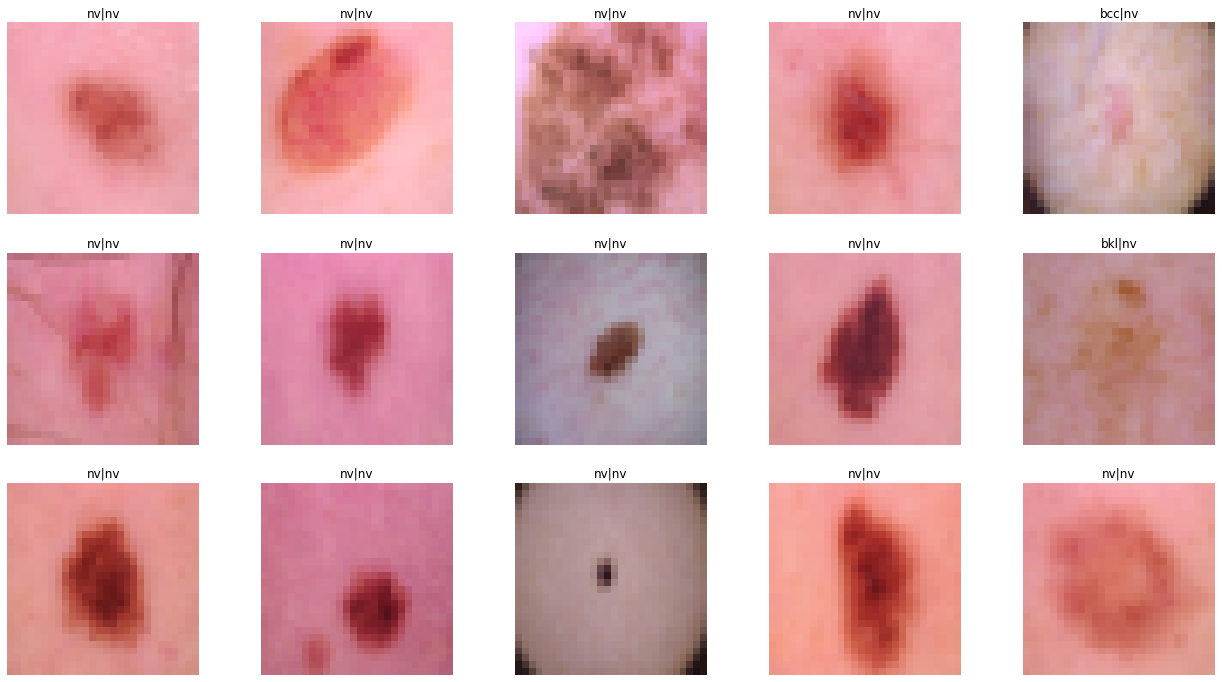

In [ ]:
test_model(model, X_test_orig, Y_test_orig)

In [ ]:
X_train_aug, X_test_aug, Y_train_aug, Y_test_aug = prepare_for_train_test(X_aug, Y_aug)

In [ ]:
model2 = create_model()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 28, 28, 16)        448       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 14, 14, 16)       0         
 2D)                                                             
                                                                 
 dropout_3 (Dropout)         (None, 14, 14, 16)        0         
                                                                 
 conv2d_5 (Conv2D)           (None, 14, 14, 32)        4640      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 7, 7, 32)         0         
 2D)                                                             
                                                                 
 dropout_4 (Dropout)         (None, 7, 7, 32)         

In [ ]:
model2_history = train_model(model2, X_train_aug, Y_train_aug, 50)

Epoch 1/50
4146/4146 [==============================] - 430s 104ms/step - loss: 0.6519 - accuracy: 0.7732 - val_loss: 0.7162 - val_accuracy: 0.7429 - lr: 0.0010
Epoch 2/50
4146/4146 [==============================] - 435s 105ms/step - loss: 0.4194 - accuracy: 0.8482 - val_loss: 0.4598 - val_accuracy: 0.8346 - lr: 0.0010
Epoch 3/50
4146/4146 [==============================] - 432s 104ms/step - loss: 0.2798 - accuracy: 0.8988 - val_loss: 0.2899 - val_accuracy: 0.8985 - lr: 0.0010
Epoch 4/50
4146/4146 [==============================] - 441s 106ms/step - loss: 0.2046 - accuracy: 0.9275 - val_loss: 0.1074 - val_accuracy: 0.9668 - lr: 0.0010
Epoch 5/50
4146/4146 [==============================] - 391s 94ms/step - loss: 0.1619 - accuracy: 0.9431 - val_loss: 0.0775 - val_accuracy: 0.9761 - lr: 0.0010
Epoch 6/50
4146/4146 [==============================] - 408s 99ms/step - loss: 0.1343 - accuracy: 0.9532 - val_loss: 0.0645 - val_accuracy: 0.9829 - lr: 0.0010
Epoch 7/50
4146/4146 [==============

In [ ]:
plot_model_training_curve(model2_history) 

Test Accuracy: 100.000%
              precision    recall  f1-score   support

          nv       1.00      1.00      1.00     45447
         mel       1.00      1.00      1.00      7561
         bkl       1.00      1.00      1.00      5009
         bcc       1.00      1.00      1.00      4496
       akiec       1.00      1.00      1.00      1708
        vasc       1.00      1.00      1.00      1321
          df       1.00      1.00      1.00       790

    accuracy                           1.00     66332
   macro avg       1.00      1.00      1.00     66332
weighted avg       1.00      1.00      1.00     66332



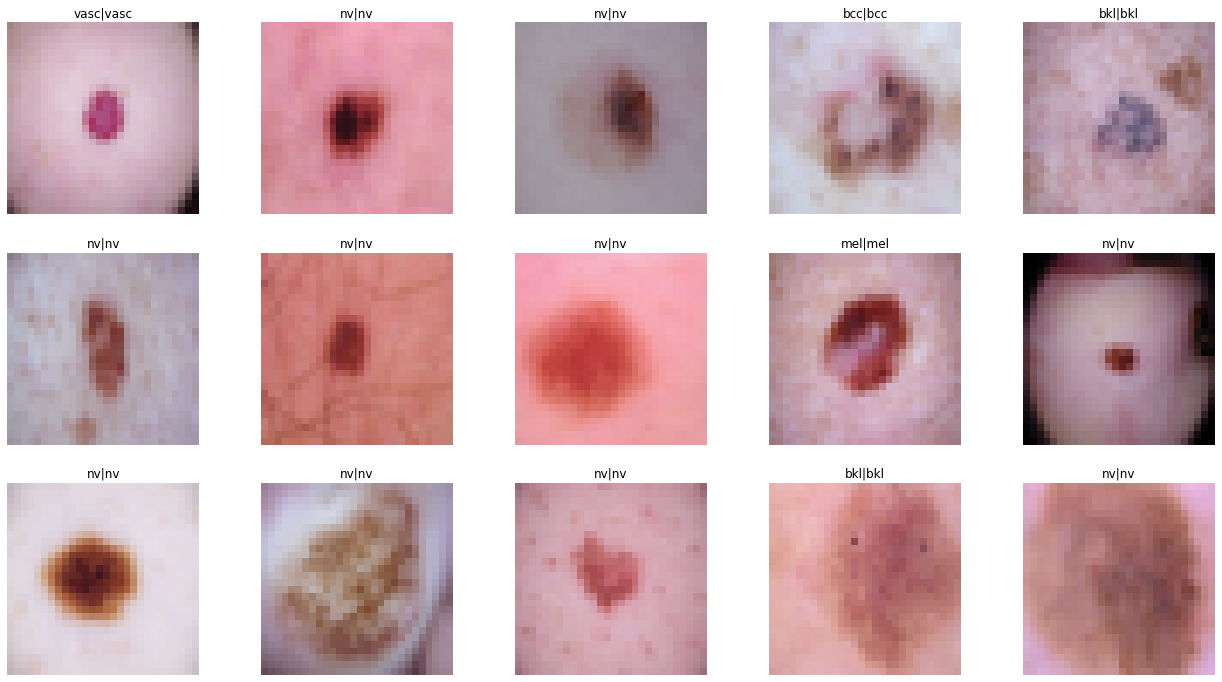

In [ ]:
# test_model(model, X_test_orig, Y_test_orig)
test_model(model2, X_test_aug, Y_test_aug)

In [ ]:
modelx = tf.keras.models.load_model('ml_clinical_applications')

In [ ]:
model.save("ml_clinical_applications")

INFO:tensorflow:Assets written to: ml_clinical_applications/assets


In [ ]:
pip install keras_flops

     |████████████████████████████████| 462 kB 5.4 MB/s 


In [ ]:
from keras_flops import get_flops

In [ ]:
from tensorflow import keras
model = keras.models.load_model('ml_clinical_applications')

In [ ]:
flops = get_flops(model, batch_size=1)
print(f"FLOPS: {flops / 10 ** 9:.03} G")

Instructions for updating:
Use `tf.compat.v1.graph_util.tensor_shape_from_node_def_name`


Instructions for updating:
Use `tf.compat.v1.graph_util.tensor_shape_from_node_def_name`


FLOPS: 0.00677 G
